# P&D ISSP 2023 - Base notebook
@Students: Edit everything you want!

Packages

In [1]:
import matplotlib
import soundfile
import package.general as genfcns
import package.gui_utils as guifcns
matplotlib.style.use('default')  # <-- for notebooks: white figures background

# Root path (path to where you are storing this very notebook)
#  /!/  Adapt this to your system  /!/ 
ROOTPATH = 'your/path/to/this/notebook'

pathToSoundFiles = f'{ROOTPATH}/sound_files/'

# Parameters
speechfilenames = [
    pathToSoundFiles + 'speech1.wav',
    pathToSoundFiles + 'speech2.wav'
]
noisefilenames = [
    pathToSoundFiles + 'Babble_noise1.wav'
]
signalDuration = 10     # [s]
muGSC = 0.1     # NLMS update constant for freq.-domain GSC

Build acoustic scenario and generate RIRs using GUI

In [2]:
# Launch GUI
guifcns.RIRg_GUI(
    exportFolder='./rirs',
    outputRIRplot=False,
    distBwMics=10,  # [cm]
    fs=44100,
    t60=0,
    theme='SystemDefault',
)

Note that the RIRs are sampled at 44100 Hz.
PyRoomAcoustics is computing the 10 RIRs...
RIRs computed successfully. Saving as Pickle archive.
RIRs saved in file: "rirs_20230207_16h01m44s.pkl.gz", in folder
"rirs"


RIRs selection

In [3]:
# Select RIRs to be used
# RIR_FILE = 'rirs/'  # use this to input a specific set of RIRs (full path to .pkl.gz file)
RIR_FILE = genfcns.select_latest_rir(path='./rirs/')  # use this to select the lastly generated RIRs
# Load from Pickle archive
acousticScenario = guifcns.load_rirs(path=RIR_FILE)
# Show to user
print(acousticScenario)

Acoustic scenario object containing the RIRs, with parameters:
>> Field "audioCoords": [[3.025, 3.875]]
>> Field "audioIds": ['20']
>> Field "c": 340
>> Field "distBwMics": 10
>> Field "exportFolder": ./rirs
>> Field "fs": 44100
>> Field "lineIds": [1, 3, 4, 6, 8, 10, 12, 14, 16, 18]
>> Field "lineTextIds": [2, 5, 7, 9, 11, 13, 15, 17, 19]
>> Field "micsCoords": [[3.9000000000000004, 2.15], [3.9000000000000004, 2.25], [3.9000000000000004, 2.3499999999999996], [3.9000000000000004, 2.45], [3.9000000000000004, 2.55]]
>> Field "micsIds": ['22', '23', '24', '25', '26']
>> Field "nMicsPerArray": 5
>> Field "noiseCoords": [[1.3, 0.95]]
>> Field "noiseIds": ['21']
>> Field "rd": [5.0, 5.0]
>> Field "rirLength": 22050
>> Field "roomDim": 5
>> Field "t60": 0.0
>> Field "theme": SystemDefault



In [4]:
# From here on, it's all up to you...

# Signal processing - Week 2: MUSIC algorithm

Computing DOAs via freq.-domain MUSIC algorithm...
All estimated DOAs: [0. 0.]
Oracle-selected estimated DOAs: [0.]


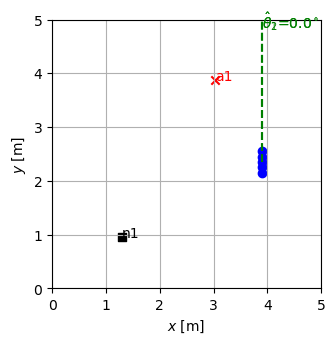

In [6]:
import numpy as np

winLength = 1024 # Window length
nSources = acousticScenario.RIRsAudio.shape[-1] +\
    acousticScenario.RIRsNoise.shape[-1] # Number of sources
theta = np.arange(0, np.pi, step=np.pi / 360)  # angles to consider

print('Computing DOAs via freq.-domain MUSIC algorithm...')


# DOAestAll = yourMUSIC() ...
DOAestAll = np.zeros(nSources)  # default


print(f'All estimated DOAs: {DOAestAll * 180/np.pi}')

# ------------------ DOA estimation performance check ------------------
# Oracle selection of the target DOA
DOAest = genfcns.oracle_choice_doa(DOAestAll, acousticScenario)
print(f'Oracle-selected estimated DOAs: {DOAest * 180/np.pi}')
# Check validity
genfcns.check_plot_tdoas(DOAest, DOAestAll, acousticScenario)